In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv("train.csv")
display(titanic.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Label Encoding

Sex değişkenini Mean encoding yaparak encode ediniz. Her kategori için Survived değişkeninin ortalamasını kategori adı ile değiştirebilirsiniz. 

IPUCU: pandas groupby ve map fonksiyonlarını kullanabilirsiniz.

In [3]:
df_mean_enc=titanic.copy()
mean_values=df_mean_enc.Survived.groupby(df_mean_enc.Sex).mean()
df_mean_enc["Sex_encoded"]=df_mean_enc.Sex.map(mean_values)

In [4]:
df_mean_enc

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.188908
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.742038
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.742038
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.742038
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.188908
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.188908
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.742038
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.742038
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.188908


Bindikleri Yer (Embarked) değişkenini sklearn OneHotEncoder objesini kullanarak encode edin.<br>

In [5]:
#Handling NA values
df_onehot = titanic.copy()
df_onehot["Embarked"].value_counts()
df_na_removed=df_onehot.dropna(subset=['Embarked'])
print("Since number of NA values is quite small, I prefered to remove them from my dataset")

Since number of NA values is quite small, I prefered to remove them from my dataset


In [6]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
encoded_features = enc.fit_transform(df_na_removed[["Embarked"]]).astype(np.uint8)
categories=enc.categories_[0].tolist()
pd.DataFrame(encoded_features,columns=categories)


,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
884,0,0,1
885,0,0,1
886,0,0,1
887,1,0,0


Cabin değişkenini sklearn LabelEncoder veya OrdinalEncoder objesini kullanarak encode edin.

In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

df_lbl = titanic.copy()
#Handling NA values
df_lbl["Cabin"].fillna("Na",inplace=True)

In [9]:
enc = LabelEncoder()

df_lbl["Cabin_enc"] = enc.fit_transform(df_lbl.Cabin)
df_lbl

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_enc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Na,S,146
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,81
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Na,S,146
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,55
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Na,S,146
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Na,S,146
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,30
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,Na,S,146
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,60


# Outlier Handling

Fare değişkeni için boxplot çizdiriniz.

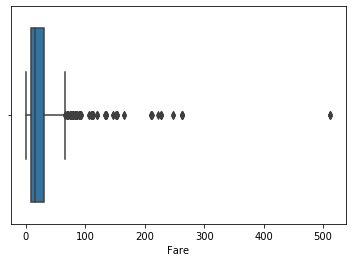

In [10]:
import seaborn as sns
sns.boxplot(titanic["Fare"])

Fare değişkeninedeki outlier değerleri Z-Score kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız. 

In [11]:
from scipy.stats import zscore
df_outlier=titanic.copy()
z_value=zscore(df_outlier["Fare"])
((z_value>3) | (z_value<-3) ).sum()

20

In [12]:
upper_limit = df_outlier[z_value<=3]["Fare"].max()
lower_limit = df_outlier[z_value>=-3]["Fare"].min()

In [13]:
upper_limit,lower_limit

(164.8667, 0.0)

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [14]:
df_outlier["Fare"][z_value>3]=upper_limit
df_outlier["Fare"][z_value<-3]=lower_limit

C:\Users\Alican\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Alican\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Fare değişkeninedeki outlier değerleri IQR metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [15]:
df2_outlier=titanic.copy()
q1 = df2_outlier["Fare"].quantile(q=0.25)
q3 = df2_outlier["Fare"].quantile(q=0.75)
iqr = q3-q1
iqr 

23.0896

In [16]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
lower_limit, upper_limit

(-26.724, 65.6344)

In [17]:
#limit values
upper_limit_=df2_outlier[(df2_outlier.Fare<=upper_limit)].Fare.max()
lower_limit_=df2_outlier[(df2_outlier.Fare>=lower_limit)].Fare.min()
upper_limit_, lower_limit_

(65.0, 0.0)

In [18]:
outliers=df2_outlier[(df2_outlier.Fare>upper_limit) | (df2_outlier.Fare<lower_limit)].Fare

In [19]:
len(outliers)

116

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [20]:
df2_outlier["Fare"][df2_outlier.Fare>upper_limit]=upper_limit_
df2_outlier["Fare"][df2_outlier.Fare<lower_limit]=lower_limit_

C:\Users\Alican\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Alican\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Fare değişkeninedeki outlier değerleri Hard-Edges metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [21]:
df3_outlier=titanic.copy()
lower_limit = df3_outlier["Fare"].quantile(q=0.01)
upper_limit = df3_outlier["Fare"].quantile(q=0.99)

In [22]:
upper_limit,lower_limit

(249.00622000000033, 0.0)

In [23]:
outliers_=df3_outlier[(df3_outlier.Fare>upper_limit) | (df3_outlier.Fare<lower_limit)].Fare
outliers_

27     263.0000
88     263.0000
258    512.3292
311    262.3750
341    263.0000
438    263.0000
679    512.3292
737    512.3292
742    262.3750
Name: Fare, dtype: float64

In [24]:
len(outliers_)

9

In [25]:
upper_limit_=df3_outlier[(df3_outlier.Fare<=upper_limit)].Fare.max()
lower_limit_=df3_outlier[(df3_outlier.Fare>=lower_limit)].Fare.min()
upper_limit_,lower_limit_

(247.5208, 0.0)

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [26]:
#python kodu buraya
df3_outlier["Fare"][df3_outlier.Fare>upper_limit]=upper_limit_
df3_outlier["Fare"][df3_outlier.Fare<lower_limit]=lower_limit_

C:\Users\Alican\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Alican\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Fare değişkeni için yukarıdaki 3 metodu kullanarak sınır değerler olarak bulduğunuz değerleri ve outlier sayılarını karşılaştırın. Bu değişken için hangisini kullanmak daha mantıklı olabilir?

In [33]:
print("Lowest number of outliers is observed in HardEdge method as expected. It only excludes %1 of the data from each sides. Number of outliers are bigger in Z-score method than Hard-edge method but much lower than the IQR method in our case.\nLet's see the new boxplots after 3 methods applied:")  

Lowest number of outliers is observed in HardEdge method as expected. It only excludes %1 of the data from each sides. Number of outliers are bigger in Z-score method than Hard-edge method but much lower than the IQR method in our case.
Let's see the new boxplots after 3 methods applied:


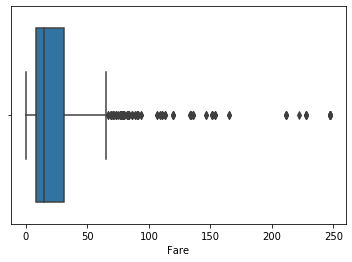

In [28]:
# After Hard-Edge is applied
import seaborn as sns
sns.boxplot(df3_outlier["Fare"])

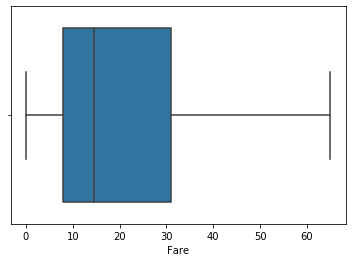

In [29]:
# After IQR Method is applied
import seaborn as sns
sns.boxplot(df2_outlier["Fare"])


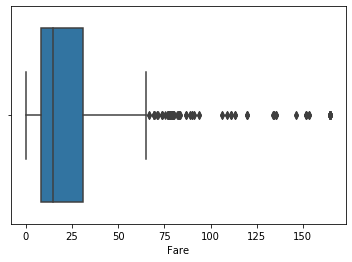

In [30]:
# After Z-score Method is applied
import seaborn as sns
sns.boxplot(df_outlier["Fare"])

In [31]:
print("As can be seen above, only after IQR method the new plot does not include outliers. This is mostly because of the definition of the box_plot and how the 'outlier' is defined in boxplot graph.To me, depending on the aim of the analysis, each method can be used.")

As can be seen above, only after IQR method the new plot does not include outliers. This is mostly because of the definition of the box_plot and how the 'outlier' is defined in boxplot graph.To me, depending on the aim of the analysis, each method can be used.
